# 循环发电场案例

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

data = pd.read_csv('./data/ccpp.csv')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [2]:
data.shape #(9568, 5) 表明是9568*5的数据集

(9568, 5)

In [3]:
X = data[['AT','V','AP','RH']]
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [4]:
y = data[['PE']]
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)  #(7176, 4)
print(y_train.shape)  #(7176, 1)
print(X_test.shape)   #(2392, 4)
print(y_test.shape)   #(2392, 1)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


scikit-learn的线性回归算法是使用最小二乘法来实现的。

In [6]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

拟合完成后，查看模型系数拟合结果：

In [7]:
print(linreg.intercept_)   #截距
print(linreg.coef_)        #回归系数

[460.05727267]
[[-1.96865472 -0.2392946   0.0568509  -0.15861467]]


In [8]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
#scikit-learn计算MSE RMSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))    #MSE: 19.4303412392
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  #RMSE: 4.4079860752

MSE: 20.837191547220353
RMSE: 4.564777272465805


In [9]:
X = data[['AT','V','AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print("MSE:",metrics.mean_squared_error(y_test, y_pred))    
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))    

MSE: 23.905653799527794
RMSE: 4.889340834870054


In [10]:
X = data[['AT','V','AP','RH']]
y = data[['PE']]

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)

print("MSE:",metrics.mean_squared_error(y, predicted))  
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))  

MSE: 20.79367250985753
RMSE: 4.560007950635342


In [11]:
y

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


In [12]:
predicted

array([[467.24487977],
       [444.06421837],
       [483.53893768],
       ...,
       [432.47556666],
       [443.07355843],
       [449.74395838]])

In [13]:
y.min()

PE    420.26
dtype: float64

In [14]:
y.max()

PE    495.76
dtype: float64

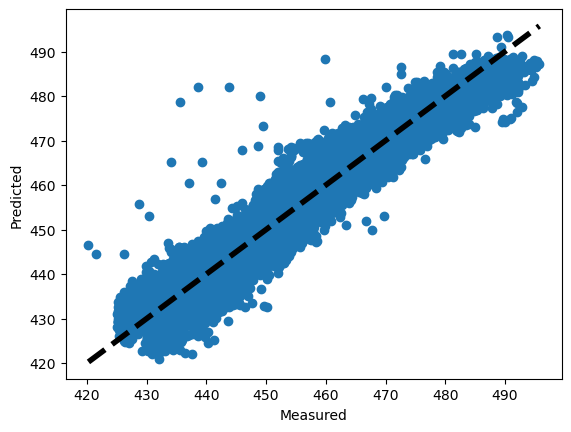

In [15]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()